# APIs


## Tasks Today:
1) <b>Requests and the pokemon API </b> <br>
 

# working with APis

<p> What exactly is an API? <br> <br>
API is the acronym for Application Programming Interface, which is a software intermediary that allows two applications to talk to each other. Each time you use an app like Facebook, send an instant message, or check the weather on your phone, you're using an API. </p>

### The Poke API  allows you to retreive a pokemon's information from PokeAPI https://pokeapi.co/



In [1]:
# making an API call
import requests

#first API request
api_endpoint = 'https://pokeapi.co/api/v2/pokemon/'

#to get info from API
requests.get(api_endpoint+'eevee').json() #reponse 200 is good, accept request, give back info then do .json() to get info
#json is built in python aka javascript ... notation
#400 Bad request. ...
#404 Resource not found. ...
#500 Internal server error.
#303 redirected to another resource via the location response header

{'abilities': [{'ability': {'name': 'run-away',
    'url': 'https://pokeapi.co/api/v2/ability/50/'},
   'is_hidden': False,
   'slot': 1},
  {'ability': {'name': 'adaptability',
    'url': 'https://pokeapi.co/api/v2/ability/91/'},
   'is_hidden': False,
   'slot': 2},
  {'ability': {'name': 'anticipation',
    'url': 'https://pokeapi.co/api/v2/ability/107/'},
   'is_hidden': True,
   'slot': 3}],
 'base_experience': 65,
 'forms': [{'name': 'eevee',
   'url': 'https://pokeapi.co/api/v2/pokemon-form/133/'}],
 'game_indices': [{'game_index': 102,
   'version': {'name': 'red', 'url': 'https://pokeapi.co/api/v2/version/1/'}},
  {'game_index': 102,
   'version': {'name': 'blue', 'url': 'https://pokeapi.co/api/v2/version/2/'}},
  {'game_index': 102,
   'version': {'name': 'yellow',
    'url': 'https://pokeapi.co/api/v2/version/3/'}},
  {'game_index': 133,
   'version': {'name': 'gold', 'url': 'https://pokeapi.co/api/v2/version/4/'}},
  {'game_index': 133,
   'version': {'name': 'silver',
    

In [2]:
#requests.get(api_endpoint+'psyduck')

pokemon = input('What Pokemon are you looking for? ')

response = requests.get(f'{api_endpoint}{pokemon}')

#access status code
response.status_code #verify with good request

if response.status_code == 200:
    data = response.json()
    print("Success") # dont print data just say success
else:
    print(f'Error, Status Code {response.status_code}')

What Pokemon are you looking for? eevee
Success


### Display a Pokemon's name, weight, abilities, and types

In [5]:
# get the name in forms
#access forms key
#first element in list 0 

data['forms'][0]['name']

'eevee'

In [6]:
# get types
data['types']

[{'slot': 1,
  'type': {'name': 'normal', 'url': 'https://pokeapi.co/api/v2/type/1/'}}]

In [7]:
# get weight
data['weight']

65

In [8]:
# get abilities
abilities = data['abilities']

In [9]:
#make a list comprehension 
[ability_dict['ability']['name'] for ability_dict in abilities]

['run-away', 'adaptability', 'anticipation']

In [10]:
# Create a structure for a single pokemon
pokemon_dict={
    'name': data ['name'],
    'types': data ['types'],
    'abilities': ['abilities'],
    'weight': data ['weight']
}


#### Create a function to Pull in your own Pokemon's data 

In [11]:
#access api endpoint with pokemon input -1
#check status -2
#accessing each key we are looking for: abilities, types, name, weight - 3
#store the values into dictionary

def poke_api_call(pokemon): #1 START HERE
    response = requests.get(f'https://pokeapi.co/api/v2/pokemon/{pokemon}') #1
    if response.status_code == 200: #2
            print('Success') #2
            data = response.json() #2 CONVERT OBJECT TO JSON data is all the info ont he right
            pokemon_dict={ #3
                'name': data ['name'],
                'types': data ['types'],
                'abilities': data ['abilities'],
                'weight': data ['weight']
            }
    else:
        print(f'Error bad requests {response.status_code}')#2
    return pokemon_dict
 
print(poke_api_call('pikachu'))

Success
{'name': 'pikachu', 'types': [{'slot': 1, 'type': {'name': 'electric', 'url': 'https://pokeapi.co/api/v2/type/13/'}}], 'abilities': [{'ability': {'name': 'static', 'url': 'https://pokeapi.co/api/v2/ability/9/'}, 'is_hidden': False, 'slot': 1}, {'ability': {'name': 'lightning-rod', 'url': 'https://pokeapi.co/api/v2/ability/31/'}, 'is_hidden': True, 'slot': 3}], 'weight': 60}


In [76]:
#THIS ALLOWS YOU TO INPUT A FORM

def poke_api_call(pokemon): #1 START HERE
    response = requests.get(f'https://pokeapi.co/api/v2/pokemon/{pokemon}') #1
    if response.status_code == 200: #2
            print('Success') #2
            data = response.json() #2 CONVERT OBJECT TO JSON data is all the info ont he right
            pokemon_dict={ #3
                'name': data ['name'],
                'types': data ['types'],
                'abilities': data ['abilities'],
                'weight': data ['weight']
            }
    else:
        print(f'Error bad requests {response.status_code}')#2
    return pokemon_dict
 
poke_api_call(input('What is your favorite pokemon? '))

What is your favorite pokemon? eevee
Success


{'name': 'eevee',
 'types': [{'slot': 1,
   'type': {'name': 'normal', 'url': 'https://pokeapi.co/api/v2/type/1/'}}],
 'abilities': [{'ability': {'name': 'run-away',
    'url': 'https://pokeapi.co/api/v2/ability/50/'},
   'is_hidden': False,
   'slot': 1},
  {'ability': {'name': 'adaptability',
    'url': 'https://pokeapi.co/api/v2/ability/91/'},
   'is_hidden': False,
   'slot': 2},
  {'ability': {'name': 'anticipation',
    'url': 'https://pokeapi.co/api/v2/ability/107/'},
   'is_hidden': True,
   'slot': 3}],
 'weight': 65}

Choose your pokemon

In [27]:
from random import randint
# Random number generated for each pokemon id
random_team = [randint(1,1010) for i in range(6)] #randit pass a random # to use

print(random_team)

#your_team = ['electabuzz', 'haunter','tyranitar','blaziken','marowak','dragonair']



[570, 195, 213, 185, 924, 657]


In [31]:
your_team = ['electabuzz', 'haunter','tyranitar','blaziken','marowak','dragonair']

your_team_dict = {pokemon: poke_api_call(pokemon) for pokemon in your_team}

print(your_team_dict)

Success
Success
Success
Success
Success
Success
{'electabuzz': {'name': 'electabuzz', 'types': [{'slot': 1, 'type': {'name': 'electric', 'url': 'https://pokeapi.co/api/v2/type/13/'}}], 'abilities': ['abilities'], 'weight': 300}, 'haunter': {'name': 'haunter', 'types': [{'slot': 1, 'type': {'name': 'ghost', 'url': 'https://pokeapi.co/api/v2/type/8/'}}, {'slot': 2, 'type': {'name': 'poison', 'url': 'https://pokeapi.co/api/v2/type/4/'}}], 'abilities': ['abilities'], 'weight': 1}, 'tyranitar': {'name': 'tyranitar', 'types': [{'slot': 1, 'type': {'name': 'rock', 'url': 'https://pokeapi.co/api/v2/type/6/'}}, {'slot': 2, 'type': {'name': 'dark', 'url': 'https://pokeapi.co/api/v2/type/17/'}}], 'abilities': ['abilities'], 'weight': 2020}, 'blaziken': {'name': 'blaziken', 'types': [{'slot': 1, 'type': {'name': 'fire', 'url': 'https://pokeapi.co/api/v2/type/10/'}}, {'slot': 2, 'type': {'name': 'fighting', 'url': 'https://pokeapi.co/api/v2/type/2/'}}], 'abilities': ['abilities'], 'weight': 520}, '

#### Use your function to create a dictionary of your Johto League 6  (favorite 6 pokemon)

In [29]:
# Place all 6 of your pokemon on the object below, each pokemon should have at least as much info as Pikachu did.
my_six_pokemon = {}

for i in random_team: #pass each indecie into function built
    poke_dict = poke_api_call(i) #return pokemon call it
    my_six_pokemon[poke_dict['name']] = poke_dict #value will be entire dictionary, storing
    
#print(my_six_pokemon) messy data
    
#loop thru dict

for k in my_six_pokemon:
    print(k, ' ', my_six_pokemon[k]) # more readible

Success
Success
Success
Success
Success
Success
zorua   {'name': 'zorua', 'types': [{'slot': 1, 'type': {'name': 'dark', 'url': 'https://pokeapi.co/api/v2/type/17/'}}], 'abilities': ['abilities'], 'weight': 125}
quagsire   {'name': 'quagsire', 'types': [{'slot': 1, 'type': {'name': 'water', 'url': 'https://pokeapi.co/api/v2/type/11/'}}, {'slot': 2, 'type': {'name': 'ground', 'url': 'https://pokeapi.co/api/v2/type/5/'}}], 'abilities': ['abilities'], 'weight': 750}
shuckle   {'name': 'shuckle', 'types': [{'slot': 1, 'type': {'name': 'bug', 'url': 'https://pokeapi.co/api/v2/type/7/'}}, {'slot': 2, 'type': {'name': 'rock', 'url': 'https://pokeapi.co/api/v2/type/6/'}}], 'abilities': ['abilities'], 'weight': 205}
sudowoodo   {'name': 'sudowoodo', 'types': [{'slot': 1, 'type': {'name': 'rock', 'url': 'https://pokeapi.co/api/v2/type/6/'}}], 'abilities': ['abilities'], 'weight': 380}
tandemaus   {'name': 'tandemaus', 'types': [{'slot': 1, 'type': {'name': 'normal', 'url': 'https://pokeapi.co/ap

## Lets create a class called 'Pokemon' and create our pokemon as instances

In [ ]:
pokemon_dict={
    'name': data ['name'],
    'types': data ['types'],
    'abilities': ['abilities'],
    'weight': data ['weight']
}



In [13]:
class Pokemon():
    
    def __init__(self, name, nickname):
        self.name = name
        self.nickname = nickname
        self.abilities = []
        self.types = []
        self.weight = None
        self.image = None
        self.call_poke_api() #calling a method, only thing callin in our class
        #self.move = Move_Tutor class
 #create method that pulls api, calls and assign each attribute
    def call_poke_api(self):
        response = requests.get(f'https://pokeapi.co/api/v2/pokemon/{self.name}')
        if response.status_code == 200:
            print('Success')
            data = response.json() #get info i need from json then ditch the rest of the info
            self.name = data ['name']
            self.abilities = data ['abilities']
            self.types = data ['types']
            self.weight = data ['weight']
            #self.image = data ['sprites']['front_default']
            self.image = data ['sprites']['versions']['generation-v']['black-white']['animated']['front_default']
            if not self.image:
                self.image = data['sprites']['other']['dream_world']['front_default']
            if not self.image:
                self.image = data ['sprites']['front_default']
        else:
            print(f'Error Status code {response.status_code}')

In [14]:
new_poke = Pokemon('pikachu', 'zappy rodent')
new_poke.call_poke_api()
print(new_poke.weight)
print(new_poke.abilities)
print(new_poke.name)
print(new_poke.image)

Success
Success
60
[{'ability': {'name': 'static', 'url': 'https://pokeapi.co/api/v2/ability/9/'}, 'is_hidden': False, 'slot': 1}, {'ability': {'name': 'lightning-rod', 'url': 'https://pokeapi.co/api/v2/ability/31/'}, 'is_hidden': True, 'slot': 3}]
pikachu
https://raw.githubusercontent.com/PokeAPI/sprites/master/sprites/pokemon/versions/generation-v/black-white/animated/25.gif


In [15]:
another_poke = Pokemon('1','vine turtle')
print(another_poke.name)
print(another_poke.image)

Success
bulbasaur
https://raw.githubusercontent.com/PokeAPI/sprites/master/sprites/pokemon/versions/generation-v/black-white/animated/1.gif


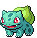

In [49]:
from IPython.display import Image

display(Image(another_poke.image))

### Let's Catch some Pokemon

In [68]:
dylans_pokemon = ['snorlax', 'psyduck', 'zapdos', 'hitmonlee'] #loop thru list and store each value, value will be put in key

In [71]:
#store each key in pokedex

for pokemon in dylans_pokemon:
    pokedex[pokemon] = Pokemon(pokemon, 'generic name')
    
print(pokedex)    

Success
Success
Success
Success
{'snorlax': <__main__.Pokemon object at 0x7fc0a90f2410>, 'psyduck': <__main__.Pokemon object at 0x7fc07846c580>, 'zapdos': <__main__.Pokemon object at 0x7fc07846e080>, 'hitmonlee': <__main__.Pokemon object at 0x7fc07846e320>}


In [70]:
pokedex = {pokemon:Pokemon(pokemon, 'nickname') for pokemon in dylans_pokemon}


Success
Success
Success
Success


In [72]:
class Pokedex:
    
    def __init__(self, username):
        self.username = username
        self.pokemon = {} 
        
    def add_pokemon(self, pokemon):
        self.pokemon[pokemon] = Pokemon(pokemon, 'monster')
        
new_pokedex = Pokedex('dylan') 

new_pokedex.add_pokemon('squirtle')

new_pokedex.username #to see attribute

new_pokedex.pokemon

Success


{'squirtle': <__main__.Pokemon at 0x7fc0a90f0af0>}

In [73]:
def print_user_pokemon(pokedex):
    print(f'{pokedex.username}\'s pokemon:')
    poke_dict = pokedex.pokemon
    for poke in pokedex.pokemon:
        print(poke_dict[poke].name)
        
print_user_pokemon(new_pokedex)        

dylan's pokemon:
squirtle


## Exercise 1:

### Create a Method prints an image of your pokemon

<p>HINT: You may need another attribute as well to store your image url within. </p>

In [ ]:
# recreate your pokemon class here
#copy class and add method 

pokemon_dict={
    'name': data ['name'],
    'types': data ['types'],
    'abilities': ['abilities'],
    'weight': data ['weight']
}

In [ ]:
#create method that pulls api, calls and assign each attribute

class Pokemon():
    def __init__(self, name, nickname):
        self.name = name
        self.nickname = nickname
        self.abilities = []
        self.types = []
        self.weight = None
        self.image = None
        self.another_poke_api() #calling a method, only thing callin in our class
        #self.move = Move_Tutor class
    def call_poke_api(self):
        response = requests.get(f'https://pokeapi.co/api/v2/pokemon/{self.name}')
        if response.status_code == 200:
            print('Success')
            data = response.json() #get info i need from json then ditch the rest of the info
            self.name = data ['name']
            self.abilities = data ['abilities']
            self.types = data ['types']
            self.weight = data ['weight']
            self.image = data ['sprites']['front_default']
        else:
            print(f'Error Status code {response.status_code}')

In [16]:
new_poke = Pokemon('eevee', 'cutie')
new_poke.call_poke_api()
print(new_poke.weight)

Success
Success
65


In [19]:
another_poke = Pokemon('eevee','cute eevee')
print(another_poke.name)
print(another_poke.image)

Success
eevee
https://raw.githubusercontent.com/PokeAPI/sprites/master/sprites/pokemon/versions/generation-v/black-white/animated/133.gif


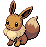

In [20]:
# Display an image in Jupyter notebook
from IPython.display import Image
display(Image(another_poke.image))



## Exercise 2:

### Create a Method that evolves your Pokemon
If your pokemon can't evolve any further print a message that says "\<name of pokemon> can't evolve."

In [23]:
#cant evolve then put a message if it cant, list last
#pokemon species -> URL -> get value and make another request on it -> Evolution Chain

karinas_pokemon = ['eevee']

In [24]:
pokedex = {pokemon:Pokemon(pokemon, 'nickname') for pokemon in karinas_pokemon}

Success


In [25]:
for pokemon in karinas_pokemon:
    pokedex[pokemon] = Pokemon(pokemon, 'generic name')
    
print(pokedex) 

Success
{'eevee': <__main__.Pokemon object at 0x7fae50e0cfd0>}


In [30]:
def print_user_pokemon(pokedex):
    print(f'{pokedex.username}\'s pokemon:')
    poke_dict = pokedex.pokemon
    for poke in pokedex.pokemon:
        print(poke_dict[poke].name)
        
print_user_pokemon(new_pokedex)  

karina's pokemon:
eevee has no evolution


Now let's evolve a few

In [ ]:
My pokemon: eevee does not evolve.

#  Final Exercise: <br> <br>Create a Move_Tutor Class that will allow the Pokemon Class to inherit a move list.
<br>
<p>for an added bonus you can make sure that if a pokemon has 4 moves the user can choose one of them to replace with a new move. </p>

In [34]:
class Move_Tutor:
    def __init__(self):
        self.move_list = [] 
        
    def teach_move(self, move):
        self.move_list.append(move)
        input = (f'What move would you like to teach {pokemon_1}? ')
    def show_moves(self):
        return self.move_list

In [40]:
class Pokemon(Move_Tutor):
    def __init__(self, name):
        self.name = name
        super().__init__()
        
poke_name = input("Enter your favorite Pokemon's name: ")
poke = Pokemon(poke_name)

while True:
    action = input("Do you want to teach or show moves? (type 'teach', 'show', or 'quit'): ")

    if action == 'teach':
        move = input("Enter move name: ")
        poke.teach_move(move)

    elif action == 'show':
        print(poke.show_moves())

    elif action == 'quit':
        break

    else:
        print("Input is invalid. Please enter 'teach', 'show', or 'quit'.")
        

Enter your favorite Pokemon's name: eevee
Do you want to teach or show moves? (type 'teach', 'show', or 'quit'): teach
Enter move name: surf
Do you want to teach or show moves? (type 'teach', 'show', or 'quit'): teach
Enter move name: throw fire
Do you want to teach or show moves? (type 'teach', 'show', or 'quit'): teach
Enter move name: spit bullets
Do you want to teach or show moves? (type 'teach', 'show', or 'quit'): show
['surf', 'throw fire', 'spit bullets']
Do you want to teach or show moves? (type 'teach', 'show', or 'quit'): teach
Enter move name: fly high
Do you want to teach or show moves? (type 'teach', 'show', or 'quit'): show
['surf', 'throw fire', 'spit bullets', 'fly high']
Do you want to teach or show moves? (type 'teach', 'show', or 'quit'): quit


In [81]:
pikachu.teach_move()


What move would you like to teach pikachu? spark
pikachu learned spark!


In [79]:
pikachu.show_moves()

pikachu's moves'
thunder
surf
earthquake
